<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Validation


In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Model Capacity
  * import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* pandas DataFrame
    * 'Electric.csv'From github

In [3]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

elec = pd.read_csv(url)

elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


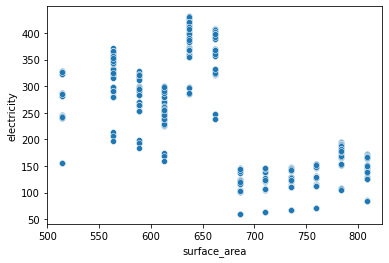

In [4]:
sns.scatterplot(elec['surface_area'], elec['electricity'])
plt.show()

### 1) 1차 모델 시각화


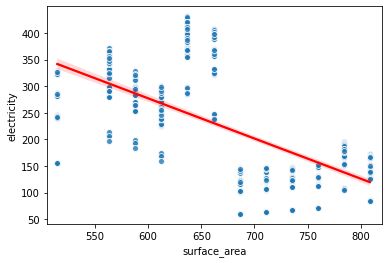

In [8]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = { 'color' : 'red'},
            scatter_kws = { 'edgecolor' : 'white'})
plt.xlim(505,820)
plt.show()

### 2) 2차 모델 시각화

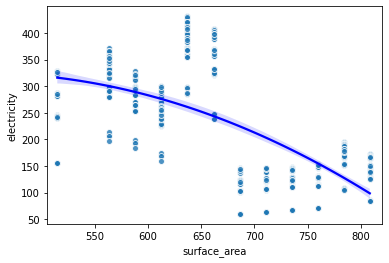

In [10]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = { 'color' : 'blue'},
            scatter_kws = { 'edgecolor' : 'white'},
            order = 2)
plt.xlim(505,820)
plt.show()

### 3) 5차 모델 시각화

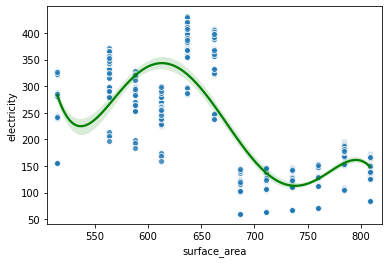

In [11]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = { 'color' : 'green'},
            scatter_kws = { 'edgecolor' : 'white'},
            order = 5)
plt.xlim(505,820)
plt.show()

### 4) 9차 모델 시각화 

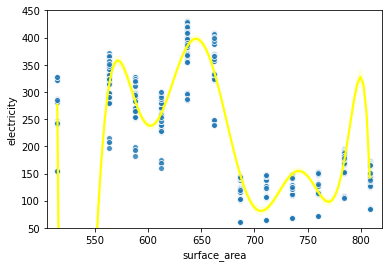

In [13]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = { 'color' : 'yellow'},
            scatter_kws = { 'edgecolor' : 'white'},
            order = 9)
plt.xlim(505,820)
plt.ylim(50, 450)
plt.show()

### 5) 4개 모델 비교 시각화

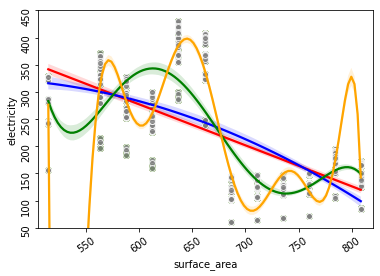

In [15]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = { 'color' : 'red'})
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = { 'color' : 'blue'},
            order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = { 'color' : 'green'},
            order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = { 'color' : 'orange'},
            order = 9, scatter_kws = { 'color' : 'grey', 'edgecolor' : 'white'})
plt.xlim(505,820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

## 2. Training Error
  * import Packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) 1차 모델 Training Error
   * X_train and y_train

In [18]:
X_train = elec[['surface_area']]
y_train = elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

  * 모델 생성

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

  * 모델 학습결과 확인

In [23]:
print(model_1.coef_)
print(model_1.intercept_)

[-0.75387157]
729.4538243006992


  * y_hat(예측값) 생성

In [24]:
y_hat1 = model_1.predict(X_train)

len(y_hat1)

768

  * MSE계산

  * y_hat(예측값) 생성

In [25]:
tr_err1 = np.mean((y_train - y_hat1) ** 2)
tr_err1

5763.983779426347

### 2) 5차 모델 Training Error
  * X 다항차수 변환
    * (768, 1) to (768, 5)

In [26]:
from sklearn.preprocessing import  PolynomialFeatures

In [27]:
poly = PolynomialFeatures(degree=5, include_bias=False)
px_5 = poly.fit_transform(X_train)
px_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

  * 5차 모델 생성

In [28]:
model_5 = LinearRegression()
model_5.fit(px_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

  * 모델 학습결과 확인

In [29]:
np.set_printoptions(suppress = True, precision = 10)

print(model_5.coef_)
print(model_5.intercept_)

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


  * y_hat(예측값) 생성

In [31]:
px_5pred = poly.fit_transform(X_train)
y_hat5 = model_5.predict(px_5pred)

y_hat5.shape

(768,)

  * MSE계산

In [32]:
tr_err5 = np.mean((y_train - y_hat5) ** 2)
tr_err5

4177.726328606075

### 3) 9차 모델 Training Error
  * X 다항차수 변환
    * (768,1) to (768, 9)

In [ ]:
poly = PolynomialFeatures(degree=9, include_bias=False)
px_9 = poly.fit_transform(X_train)
px_9

In [34]:
model_9 = LinearRegression()
model_9.fit(px_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
px_9pred = poly.fit_transform(X_train)
y_hat9 = model_9.predict(px_9pred)

y_hat9.shape

(768,)

In [37]:
tr_err9 = np.mean((y_train - y_hat9) ** 2)
tr_err9

4086.7199908150374

### 4) 3개 모델 비교

In [38]:
print('1차', tr_err1)
print('5차', tr_err5)
print('9차', tr_err9)

1차 5763.983779426347
5차 4177.726328606075
9차 4086.7199908150374


### 5) 잔차 시각화

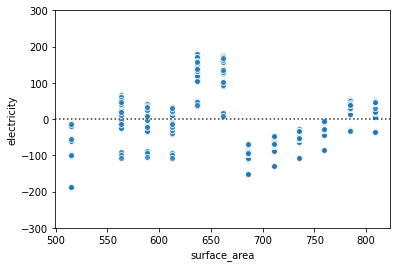

In [46]:
sns.residplot(x = 'surface_area', y = 'electricity', data = elec,
            scatter_kws = { 'edgecolor' : 'white'},
            order = 1)
plt.ylim(-300,300)
plt.show()

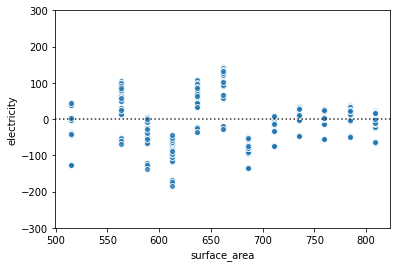

In [45]:
sns.residplot(x = 'surface_area', y = 'electricity', data = elec,
            scatter_kws = { 'edgecolor' : 'white'},
            order = 5)
plt.ylim(-300,300)
plt.show()

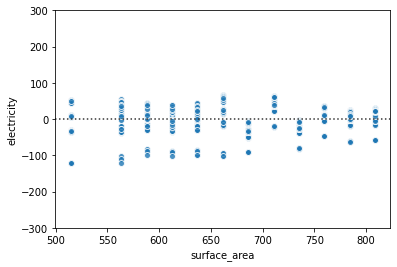

In [44]:
sns.residplot(x = 'surface_area', y = 'electricity', data = elec,
            scatter_kws = { 'edgecolor' : 'white'},
            order = 9)
plt.ylim(-300,300)
plt.show()

## 3. Testing Erro

In [47]:
from sklearn.model_selection import  train_test_split

tr_elec, te_elec = train_test_split(elec, test_size = 0.2,
                                    random_state = 2045)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(elec[['surface_area']],
                                                    elec['electricity'],
                                                    test_size = 0.2,
                                                    random_state = 2045)